# TFLite

<>:9: SyntaxWarning: invalid escape sequence '\Y'
<>:9: SyntaxWarning: invalid escape sequence '\Y'
C:\Users\Travi\AppData\Local\Temp\ipykernel_31044\3720557254.py:9: SyntaxWarning: invalid escape sequence '\Y'
  MODEL_PATH = "model\YOLOv8_bestModel.tflite"  # Replace with your YOLO TFLite model path


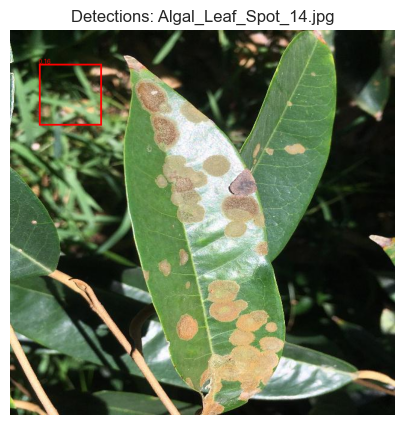

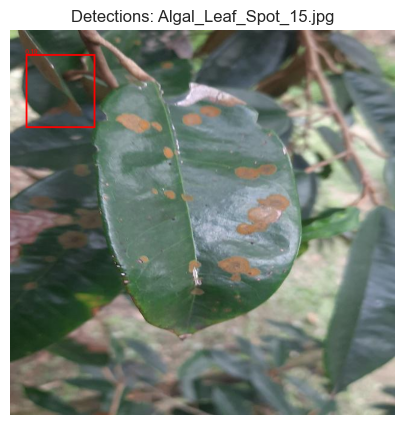

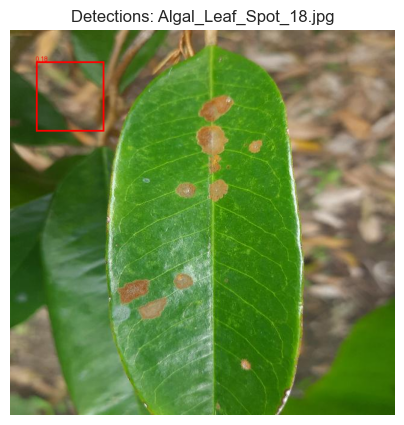

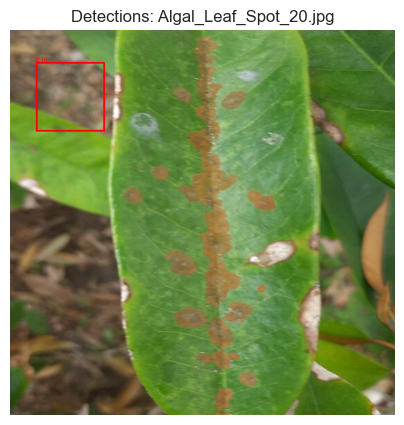

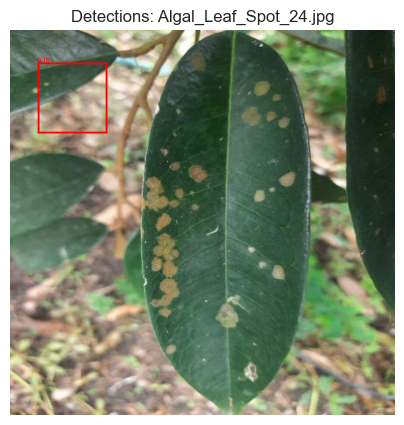

In [6]:
import os
import numpy as np
import cv2
import tensorflow as tf
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# ==== CONFIG ====
MODEL_PATH = "model\YOLOv8_bestModel.tflite"  # Replace with your YOLO TFLite model path
TEST_IMAGE_DIR = r"D:\Suvan's Projects\FYP\BBox_Split\images\test"  # Replace with your test image folder
CONFIDENCE_THRESHOLD = 0.1
INPUT_SIZE = (640, 640)  # Set according to your model
MAX_IMAGES_TO_PROCESS = 5  # Number of images to process and display

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=MODEL_PATH)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def preprocess_image(image_path):
    """Load and preprocess an image for YOLO input."""
    image = Image.open(image_path).convert("RGB")
    original_size = image.size
    image_resized = image.resize(INPUT_SIZE)
    image_np = np.array(image_resized, dtype=np.float32) / 255.0
    input_tensor = np.expand_dims(image_np, axis=0)
    return image, input_tensor, original_size

def draw_boxes(image, boxes, scores):
    """Draw bounding boxes and confidence scores on the image."""
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for box, score in zip(boxes, scores):
        draw.rectangle(box, outline="red", width=3)
        draw.text((box[0], box[1] - 10), f"{score:.2f}", fill="red", font=font)

    return image

def run_detection(image_path):
    orig_image, input_tensor, (orig_w, orig_h) = preprocess_image(image_path)

    interpreter.set_tensor(input_details[0]['index'], input_tensor)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])[0]

    boxes = []
    scores = []

    for det in output_data:
        conf = det[4]
        if conf > CONFIDENCE_THRESHOLD:
            x_center, y_center, w, h = det[:4]
            xmin = int((x_center - w / 2) * orig_w)
            ymin = int((y_center - h / 2) * orig_h)
            xmax = int((x_center + w / 2) * orig_w)
            ymax = int((y_center + h / 2) * orig_h)

            # Clamp to image bounds
            xmin, xmax = max(0, xmin), min(orig_w, xmax)
            ymin, ymax = max(0, ymin), min(orig_h, ymax)

            if xmax > xmin and ymax > ymin:
                boxes.append((xmin, ymin, xmax, ymax))
                scores.append(conf)

    result_image = draw_boxes(orig_image.copy(), boxes, scores)
    return result_image

def run_on_folder():
    """Run detection on each image in the test directory (limited to MAX_IMAGES_TO_PROCESS)."""
    processed_count = 0

    for filename in os.listdir(TEST_IMAGE_DIR):
        if processed_count >= MAX_IMAGES_TO_PROCESS:
            break

        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(TEST_IMAGE_DIR, filename)
            result = run_detection(image_path)
            processed_count += 1

            plt.figure(figsize=(5, 5))
            plt.imshow(result)
            plt.title(f"Detections: {filename}")
            plt.axis("off")
            plt.show()

if __name__ == "__main__":
    run_on_folder()

<>:8: SyntaxWarning: invalid escape sequence '\Y'
<>:8: SyntaxWarning: invalid escape sequence '\Y'
C:\Users\Travi\AppData\Local\Temp\ipykernel_31044\3822763159.py:8: SyntaxWarning: invalid escape sequence '\Y'
  MODEL_PATH = "model\YOLOv8_best.pt"  # Your YOLOv8 .pt model



image 1/1 D:\Suvan's Projects\FYP\BBox_Split\images\test\Algal_Leaf_Spot_14.jpg: 640x640 1 leaf, 106.2ms
Speed: 1.5ms preprocess, 106.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


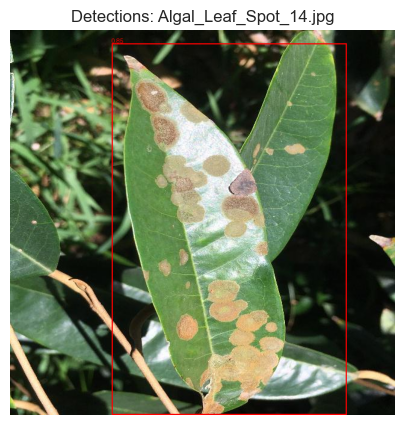


image 1/1 D:\Suvan's Projects\FYP\BBox_Split\images\test\Algal_Leaf_Spot_15.jpg: 640x640 1 leaf, 91.6ms
Speed: 1.6ms preprocess, 91.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


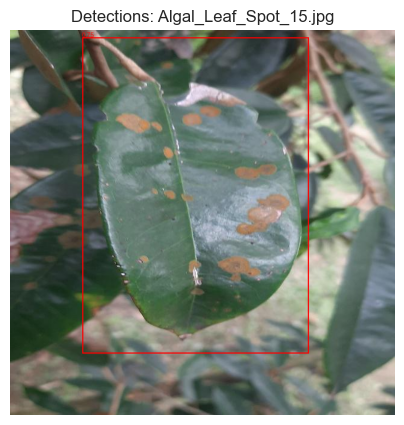


image 1/1 D:\Suvan's Projects\FYP\BBox_Split\images\test\Algal_Leaf_Spot_18.jpg: 640x640 1 leaf, 90.0ms
Speed: 1.8ms preprocess, 90.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


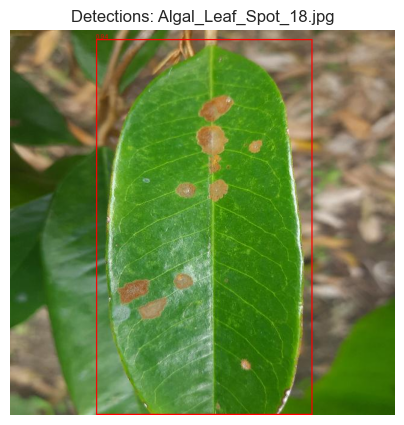


image 1/1 D:\Suvan's Projects\FYP\BBox_Split\images\test\Algal_Leaf_Spot_20.jpg: 640x640 1 leaf, 81.6ms
Speed: 1.5ms preprocess, 81.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


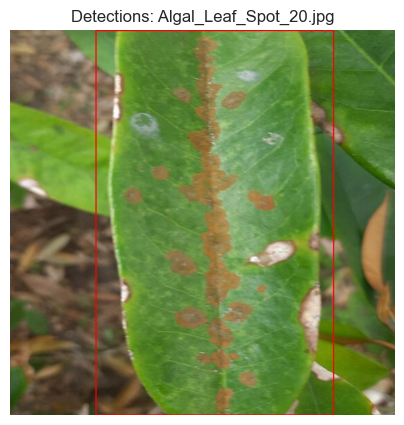


image 1/1 D:\Suvan's Projects\FYP\BBox_Split\images\test\Algal_Leaf_Spot_24.jpg: 640x640 1 leaf, 99.0ms
Speed: 1.8ms preprocess, 99.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


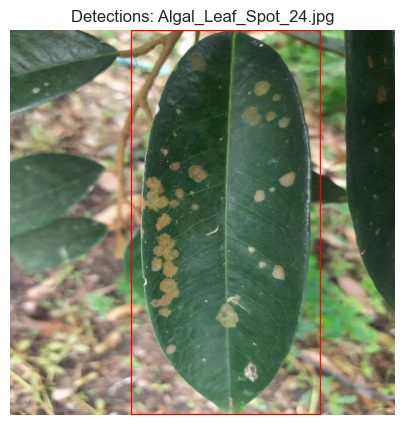

In [7]:
import os
from ultralytics import YOLO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt


# ==== CONFIG ====
MODEL_PATH = "model\YOLOv8_best.pt"  # Your YOLOv8 .pt model
TEST_IMAGE_DIR = r"D:\Suvan's Projects\FYP\BBox_Split\images\test" # Directory of test images
CONFIDENCE_THRESHOLD = 0.3
MAX_IMAGES_TO_PROCESS = 5  # Limit to 5 images

# Load the model
model = YOLO(MODEL_PATH)

def run_on_image(image_path):
    results = model(image_path)[0]  # Run prediction

    # Filter boxes by confidence threshold
    boxes = results.boxes
    filtered = boxes[boxes.conf > CONFIDENCE_THRESHOLD]

    # Load image for drawing
    img = Image.open(image_path).convert("RGB")
    img_draw = img.copy()
    draw = ImageDraw.Draw(img_draw)

    for box, score in zip(filtered.xyxy, filtered.conf):
        x1, y1, x2, y2 = map(int, box.tolist())
        draw.rectangle([(x1, y1), (x2, y2)], outline="red", width=2)
        draw.text((x1, y1 - 10), f"{score:.2f}", fill="red")

    return img_draw

def run_on_folder():
    processed_count = 0  # Track how many images we've processed

    for filename in os.listdir(TEST_IMAGE_DIR):
        if processed_count >= MAX_IMAGES_TO_PROCESS:
            break  # Stop after processing 5 images

        if filename.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(TEST_IMAGE_DIR, filename)
            result_image = run_on_image(img_path)
            processed_count += 1  # Increment counter

            plt.figure(figsize=(5, 5))
            plt.imshow(result_image)
            plt.title(f"Detections: {filename}")
            plt.axis("off")
            plt.show()

if __name__ == "__main__":
    run_on_folder()